In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iitdelhiear/gray_data.npy
/kaggle/input/iitdelhiear/label.npy
/kaggle/input/iitdelhiear/color_data.npy


In [2]:
data_clr = np.load('/kaggle/input/iitdelhiear/color_data.npy')
label = np.load('/kaggle/input/iitdelhiear/label.npy')

In [3]:
data_clr.shape

(16705, 180, 50, 3)

In [4]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import layers 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import LeakyReLU
from sklearn import metrics

2021-10-15 16:49:26.002719: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [5]:
encode=LabelEncoder()
label_encode= encode.fit_transform(label)

In [6]:
classes_cat = to_categorical(label_encode)
class_ear = list(encode.classes_)
len(class_ear)

221

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_clr, classes_cat, test_size=0.1, random_state=42)

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [10]:
model = ResNet50(include_top=False, input_shape=(180, 50, 3))
flat1=Flatten()(model.layers[-1].output)
output=Dense(221, activation='softmax')(flat1)
model=Model(inputs=model.inputs, outputs=output)
model.summary()

2021-10-15 16:49:30.812812: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-15 16:49:30.817126: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-15 16:49:30.864945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 16:49:30.865541: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-15 16:49:30.865594: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-15 16:49:30.892117: I tensorflow/stream_executor/platform/def

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 50, 3)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 56, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 25, 64)   256         conv1_conv[0][0]                 
_____________________________

In [11]:
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
hist1 = model.fit(x_train, y_train, batch_size = 128, epochs = 500, validation_split=0.1)

2021-10-15 16:49:35.972191: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1461240000 exceeds 10% of free system memory.
2021-10-15 16:49:37.302974: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-15 16:49:37.314138: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000179999 Hz


Epoch 1/500


2021-10-15 16:49:41.761020: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-15 16:49:42.564227: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-15 16:49:42.598516: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


106/106 [==============================] - ETA: 0s - loss: 4.5036 - accuracy: 0.3042

2021-10-15 16:50:07.666757: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 162432000 exceeds 10% of free system memory.


106/106 [==============================] - 32s 198ms/step - loss: 4.4841 - accuracy: 0.3064 - val_loss: 10.9519 - val_accuracy: 0.0040
Epoch 2/500
106/106 [==============================] - 18s 174ms/step - loss: 0.4003 - accuracy: 0.8964 - val_loss: 16.9850 - val_accuracy: 0.0033
Epoch 3/500
106/106 [==============================] - 18s 174ms/step - loss: 0.2708 - accuracy: 0.9363 - val_loss: 20.6809 - val_accuracy: 0.0013
Epoch 4/500
106/106 [==============================] - 18s 174ms/step - loss: 0.1777 - accuracy: 0.9537 - val_loss: 20.9017 - val_accuracy: 0.0013
Epoch 5/500
106/106 [==============================] - 18s 174ms/step - loss: 0.1847 - accuracy: 0.9515 - val_loss: 8.5790 - val_accuracy: 0.0013
Epoch 6/500
106/106 [==============================] - 18s 173ms/step - loss: 0.1847 - accuracy: 0.9545 - val_loss: 8.4733 - val_accuracy: 0.0033
Epoch 7/500
106/106 [==============================] - 18s 173ms/step - loss: 0.2306 - accuracy: 0.9443 - val_loss: 8.5121 - val_acc

In [12]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

2021-10-15 19:22:37.063824: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 180468000 exceeds 10% of free system memory.


53/53 [==============================] - 1s 21ms/step - loss: 1.0317 - accuracy: 0.8971
Loss of the model is -  1.0317169427871704
 7/53 [==>...........................] - ETA: 0s - loss: 1.3237 - accuracy: 0.8929

2021-10-15 19:22:38.625932: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 180468000 exceeds 10% of free system memory.


53/53 [==============================] - 1s 19ms/step - loss: 1.0317 - accuracy: 0.8971
Accuracy of the model is -  89.70676064491272 %


In [13]:
y_pred = model.predict(x_test)
ry_pred = np.argmax(y_pred,axis=1)
print(ry_pred)
rounded_labels = np.argmax(y_test, axis=1)
print(rounded_labels)

2021-10-15 19:22:39.930561: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 180468000 exceeds 10% of free system memory.


[ 90  49 190 ...  31 115  99]
[ 90  49 189 ...  31 115  99]


In [14]:
print("Accuracy:",metrics.accuracy_score(rounded_labels, ry_pred))
print("Precision:", metrics.precision_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
print("Recall:", metrics.recall_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
def specificity_score(y_true, y_pred):
    p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred,pos_label='positive', average='weighted')
    return r
print("sensitivity:", metrics.recall_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
#print("specificity:", specificity_score(rounded_labels1, ry_pred1))
print("f1 score:", metrics.f1_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
print(metrics.classification_report(rounded_labels, ry_pred))

Accuracy: 0.8970676241771395
Precision: 0.9054517080589
Recall: 0.8970676241771395
sensitivity: 0.8970676241771395
f1 score: 0.8932996276926206
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         7
           5       0.44      0.80      0.57         5
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         5
           8       0.86      1.00      0.92         6
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00         9
          11       1.00      0.80      0.89         5
          12       0.56      0.82      0.67        11
          13       0.88      1.00      0.93         7
          14       1.00      0.67      0.80  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

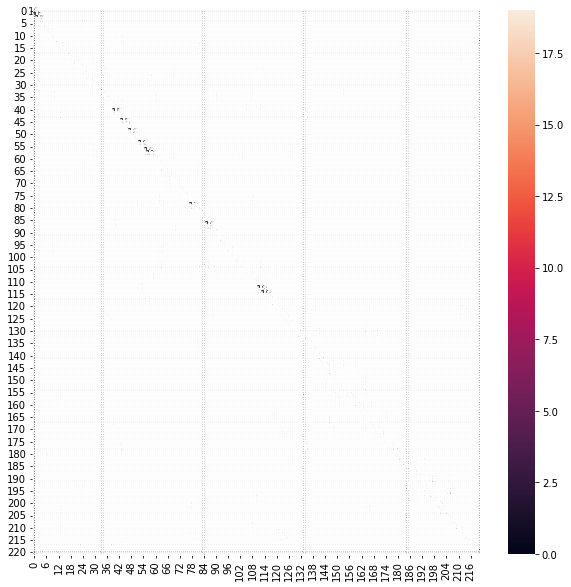

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(rounded_labels, ry_pred), annot=True, ax=ax)

In [17]:
# reshaping the predicted class 
yr_pred = y_pred.reshape(-1,1)
yr_pred.shape

(369291, 1)

In [18]:
metrics.roc_auc_score(rounded_labels.reshape(-1,1), model.predict(x_test), multi_class='ovr')

0.9984554987906763

In [19]:
# calculating the average testing and training accuracy
train_acc = hist1.history['accuracy']
train_loss = hist1.history['loss']
val_acc = hist1.history['val_accuracy']
val_loss = hist1.history['val_loss']
print('Average training accuracy: ', np.mean(train_acc))
print('Average training loss: ', np.mean(train_loss))
print('Average validation accuracy: ', np.mean(val_acc))
print('Average validation loss: ', np.mean(val_loss))

Average training accuracy:  0.9929379191398621
Average training loss:  0.02449404445057735
Average validation accuracy:  0.7521170208232943
Average validation loss:  6.175620200097561


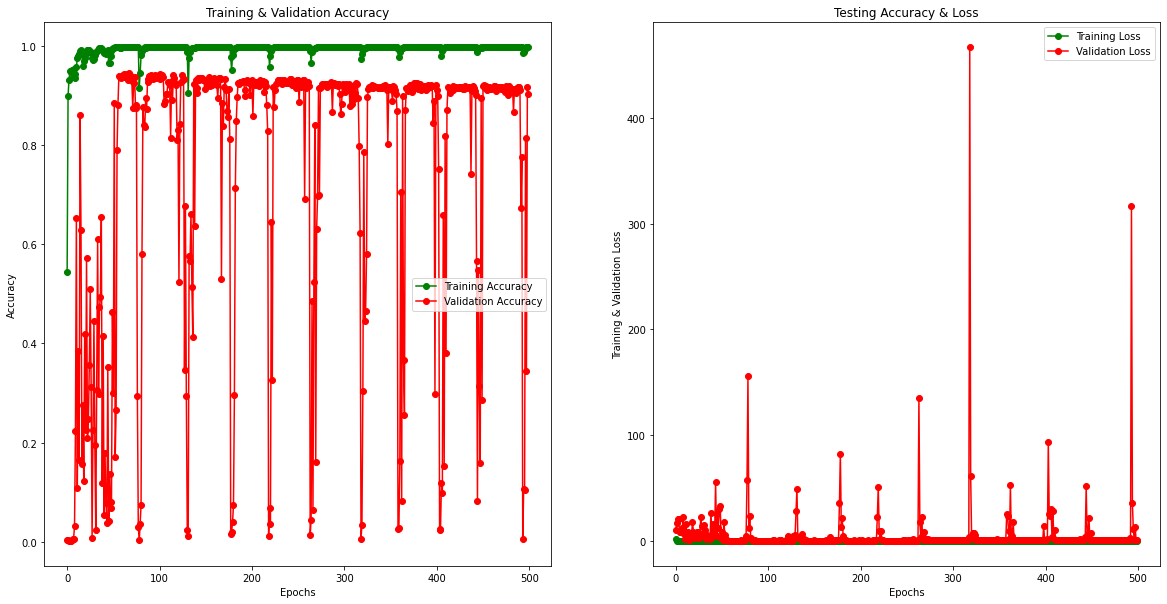

In [20]:
# plotting the accuracy and loss for validation and testing
epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()